# 1. Introduction

 In this mission and the next, we'll discuss the two most common ways for finding the optimal parameter values for a linear regression model. **`Each combination of unique parameter values forms a unique linear regression model, and the process of finding these optimal values is known as model fitting`**. 

### $MSE = \frac{1}{n} \sum_{i=1}^{n} ({\hat{y_i} - y_i})^2$

This function is the mean squared error between the predicted labels made using a given model and the true labels. The problem of choosing a set of values that minimize or maximize another function is known as an [optimization problem](https://en.wikipedia.org/wiki/Mathematical_optimization).

To build intuition for the optimization process, let's start with a single parameter linear regression model:

### $\hat{y} = a_1x_1$

Let's use the `Gr Liv Area` column for the `single parameter`:

### $hat{SalePrice} = a_1 * Gr Liv Area$

In [1]:
import pandas as pd
house=pd.read_csv('AmesHousing.txt',delimiter='\t')
house_len=int(house.shape[0]/2)
 
train=house[0:house_len]
test=house[house_len:]

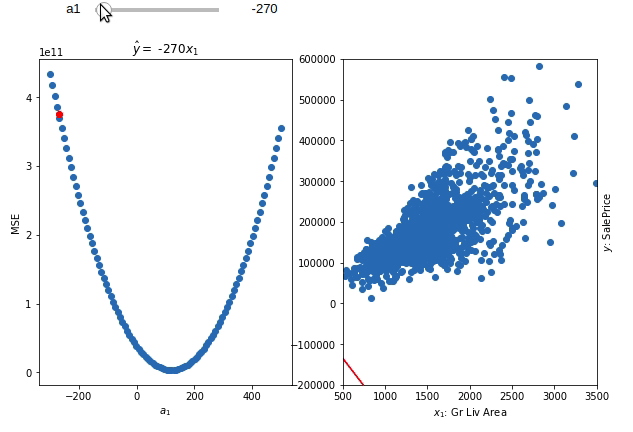

In [2]:
from IPython.display import Image
Image(filename='single_var_operation.gif')

# 2. Single Variable Gradient Descent

In the above image, we observed how the optimization function follows a curve with a minimum value. 
* This should remind you of our exploration of relative minimum values from calculus. If you recall, we computed the critical points by calculating the curve's derivative, setting it equal to $0$, and finding the $x$ value at this point. Unfortunately, `this approach won't work when we have multiple parameter values because minimizing one parameter value may increase another parameter's value`. 
* In addition, while we can plot the MSE curve when we only have a single parameter we're trying to find and visually select the value that minimizes the MSE, `this approach won't work when we have multiple parameter values because we can't visualize past 3 dimensions`.

* In this mission, we'll explore an iterative technique for solving this problem, known as gradient descent. **The [gradient descent algorithm](https://en.wikipedia.org/wiki/Gradient_descent) works by iteratively trying different parameter values until the model with the lowest mean squared error is found**. Gradient descent is a commonly used optimization technique for other models as well, like neural networks

Here's an overview of the gradient descent algorithm for a single parameter linear regression model:

* select initial values for the parameter: $a_1$
* repeat until convergence (usually implemented with a max number of iterations):
* calculate the error (MSE) of model that uses current parameter value: $MSE(a_1) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)} ) ^2$
* calculate the derivative of the error (MSE) at the current parameter value: $\frac{d}{da_1} MSE(a_1)$
* update the parameter value by subtracting the derivative times a constant ($\alpha$, called the learning rate): $a_1 := a_1 - \alpha \frac{d}{da_1} MSE(a_1)$


**`Selecting an appropriate initial parameter and learning rate will reduce the number of iterations required to converge, and is part of hyperparameter optimization.`**

# 3. Derivative Of The Cost Function

In mathematical optimization, **a function that we optimize through minimization is known as a cost function or sometimes as the loss function.** 

In [3]:
def derivative(a1, xi_list, yi_list):
    # Modify this function.
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += xi_list[i]*(a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv
    

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial):
    a1_list = [a1_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        deriv = derivative(a1, xi_list, yi_list)
        a1_new = a1 - alpha*deriv
        a1_list.append(a1_new)
    return(a1_list)


# 4. Understanding Multi Parameter Gradient Descent

Now that we've understood how single parameter gradient descent works, let's build some intuition for multi parameter gradient descent. Let's start by visualizing the MSE as a function of the parameter values for the following simple linear regression model:

### $SalePrice = a_1 * Gr Liv Area + a_0$

In the below image, we've generated a 3D scatter plot with:

* $a_0$ on the x-axis
* $a_1$ on the y-axis
* $MSE$ on the z-axis

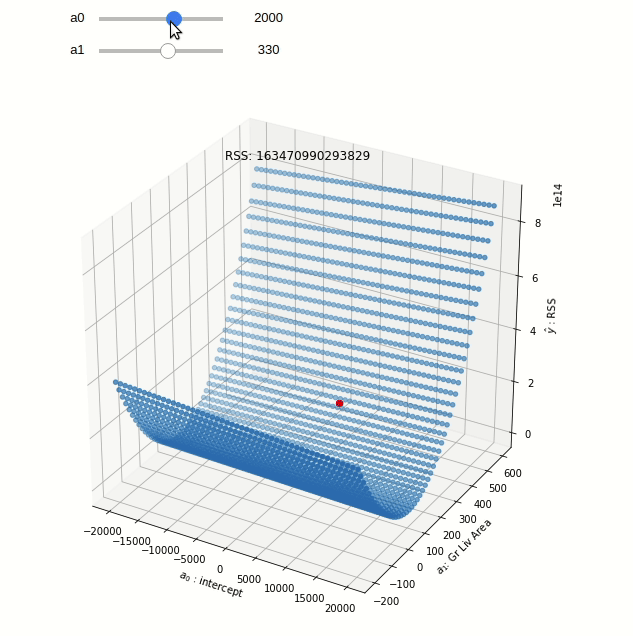

In [4]:
from IPython.display import Image
Image(filename='surface_plot.gif')

# 5. Gradient Of The Cost Function

**The [gradient](https://en.wikipedia.org/wiki/Gradient) is a multi variable generalization of the derivative**

we were concerned with minimizing the following cost function:

### $\displaystyle  MSE(a_1) = \frac{1}{n} \sum\limits_{i=1}^{n} \left(a_1x_1^{(i)} - y^{(i)}\right) ^2$

When we have 2 parameter values ($a_o$ and $a_1$), the cost function is now a function of two variables, not one:

### $\displaystyle  MSE(a_0, a_1) = \dfrac{1}{n} \sum\limits_{i=1}^{n} \left(a_0 + a_1x_1^{(i)} - y^{(i)} \right) ^2$

Instead of one update rule, we now need two update rules. We need one for $a_o$:

### $\displaystyle a_0 := a_0 - \alpha \dfrac{d}{da_0} MSE(a_0, a_1)$

and one for $a_1$

### $a_1 := a_1 - \alpha \dfrac{d}{da_1} MSE(a_0, a_1)$

Earlier in this mission, we determined that $\frac{d}{da_1} MSE(a_1)$ worked out to $\displaystyle \frac{2}{n} \sum\limits_{i=1}^{n} x_1^{(i)}\left(a_1x_1^{(i)} - y^{(i)}\right)$.

For the multiparameter case, we need to include the additional parameter:
$\displaystyle  \dfrac{d}{da_1} MSE(a_0, a_1) = \frac{2}{n} \sum\limits_{i=1}^{n} x_1^{(i)}\left(a_0 + a_1x_1^{(i)} - y^{(i)}\right)$

In [5]:
def a1_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += xi_list[i]*(a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv

def a0_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += a0 + a1*xi_list[i] - yi_list[i]
    deriv = 2*error/len_data
    return deriv

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial, a0_initial):
    a1_list = [a1_initial]
    a0_list = [a0_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        a0 = a0_list[i]
        
        a1_deriv = a1_derivative(a0, a1, xi_list, yi_list)
        a0_deriv = a0_derivative(a0, a1, xi_list, yi_list)
        
        a1_new = a1 - alpha*a1_deriv
        a0_new = a0 - alpha*a0_deriv
        
        a1_list.append(a1_new)
        a0_list.append(a0_new)
    return(a0_list, a1_list)

a0_params, a1_params = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, .0000003, 150, 1000)
print(a0_params)
print(a1_params)

[1000, 999.9729786625256, 999.9860020534898, 999.980243273623, 999.9832938914915, 999.982212639318, 999.9830693572887, 999.9830171094992, 999.983391193716, 999.9835653155, 999.9838332256041, 999.9840571461727, 999.9843016991254, 999.9845365748563, 999.9847759894737, 999.9850132751993, 999.9852515594198, 999.9854893752976, 999.9857274108231, 999.9859653433084, 999.9862033241038]
[150, 105.29008766866895, 126.26036851730264, 116.42468175481287, 121.03791169780983, 118.87416918542094, 119.88902868155621, 119.41302912593835, 119.63628688728994, 119.5315721318833, 119.58068625911876, 119.55765005690341, 119.56845450899469, 119.56338668589865, 119.56576343279643, 119.56464845454842, 119.56517119943337, 119.56492580337131, 119.56504068830095, 119.56498659071057, 119.5650117509571]


# 6. Gradient Descent For Higher Dimensions

What if we want to use many parameters in our model? Gradient descent actually scales to as many variables as you want. Each parameter value will need its own update rule, and it closely matches the update rule for $a_1$:

$ \displaystyle  a_0 := a_0 - \alpha \dfrac{d}{da_0} MSE \\
 a_1 := a_1 - \alpha \dfrac{d}{da_1} MSE \\ 
 a_2 := a_2 - \alpha \dfrac{d}{da_2} MSE \\ 
 \vdots\\
 a_n := a_n - \alpha \dfrac{d}{da_n} MSE \\ $

Besides the derivative for the MSE with respect to the intercept value ($a_0$), the derivatives for other parameters are identical:

$ \displaystyle  \dfrac{d}{da_1} MSE = \frac{2}{n} \sum_{i=1}^{n} x_1^{(i)}\left(\hat{y}^{(i)} - y^{(i)}\right) \\  
\displaystyle \dfrac{d}{da_2} MSE = \dfrac{2}{n} \sum_{i=1}^{n} x_2^{(i)}\left(\hat{y}^{(i)} - y^{(i)}\right) \\
 \vdots\\
\displaystyle \dfrac{d}{da_n} MSE = \dfrac{2}{n} \sum_{i=1}^{n} x_n^{(i)}\left(\hat{y}^{(i)} - y^{(i)}\right)  \\ $

 The main challenges with gradient descent include:

* Choosing good initial parameter values
* Choosing a good learning rate (falls under the domain of hyperparameter optimization)